# Setting up the System

## To run in local system

In [5]:
!pip install openai
!pip install python-dotenv

In [12]:
import openai
from google.colab import userdata

In [13]:
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')

## To run in Google Colab

In [28]:
from google.colab import userdata
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY_1')

In [29]:
import openai
openai.api_key = OPENAI_API_KEY

# MedMCQA Casestudy


MedMCQA is a large-scale, Multiple-Choice Question Answering (MCQA) dataset designed to address real-world medical entrance exam questions.

MedMCQA has more than 194k high-quality AIIMS & NEET PG entrance exam MCQs covering 2.4k healthcare topics and 21 medical subjects are collected with an average token length of 12.77 and high topical diversity.

Link to the dataset:https://huggingface.co/datasets/medmcqa?row=12

In [30]:
def get_response(messages,model="gpt-3.5-turbo"):

    response = openai.chat.completions.create(
        model=model,
        messages=messages)

    return response.choices[0].message.content

In [31]:
first_question= '''Following endaerectomy on the right common carotid, a patient is found to be blind in the right eye.
It is appears that a small thrombus embolized during surgery and lodged in the aery supplying the optic nerve.
Which aery would be blocked?
(A)Central aery of the retina
(B)Infraorbital aery
(C)Lacrimal aery
(D)Nasociliary aretry
'''

In [32]:
first_question_answer= 'A'

In [33]:
second_question='''All of the following are surgical options for morbid obesity except -
(A)Adjustable gastric banding
(B)Biliopancreatic diversion
(C)Duodenal Switch
(D)Roux en Y Duodenal By pass
'''

In [34]:
second_question_answer='D'

In [35]:
third_question='''Growth hormone has its effect on growth through?
(A)Directly
(B)IG1-1
(C)Throxine
(D)Intranuclear receptors
'''

In [36]:
third_question_answer='B'

In [37]:
fourth_question='''The pharmakokinetic change occurring in geriatric patient is due to
(A)Gastric absorption
(B)Liver metabolism
(C)Renal clearance
(D)Hypersensitivity
'''

Define the System role

In [38]:
system_role = "You are a helpful assistant that answers multiple choice questions about medical knowledge."

# Few Shot Prompting

In [39]:
user_prompt = f'''Question:{first_question}
Answer:{first_question_answer}

Question:{second_question}
Answer:{second_question_answer}

Question:{third_question}
Answer:{third_question_answer}

Question:{fourth_question}
Answer:
'''

In [40]:
messages=[{'role':'system','content':system_role},
          {'role':'user','content':user_prompt}
          ]

In [41]:
print(get_response(messages))

(B) Liver metabolism


# One Shot Prompting

In [ ]:
user_prompt = f'''Question:{first_question}
Answer:{first_question_answer}

Question:{fourth_question}
Answer:
'''

In [ ]:
messages=[{'role':'system','content':system_role},
          {'role':'user','content':user_prompt}
          ]

In [ ]:
print(get_response(messages))

C) Renal clearance


# Zero Shot Prompting

In [ ]:
user_prompt = f'''Question:{fourth_question}
Answer:
'''

In [ ]:
messages=[{'role':'system','content':system_role},
          {'role':'user','content':user_prompt}
          ]

In [ ]:
print(get_response(messages))

(C) Renal clearance

Pharmacokinetic changes in geriatric patients are often due to decreased renal function. This can result in slower clearance of drugs, leading to increased accumulation and potentially higher risk of drug toxicity. Gastric absorption and liver metabolism can also be affected in geriatric patients, but renal clearance is considered one of the most significant factors contributing to pharmacokinetic changes in this population. Hypersensitivity, on the other hand, is not directly related to pharmacokinetic changes.


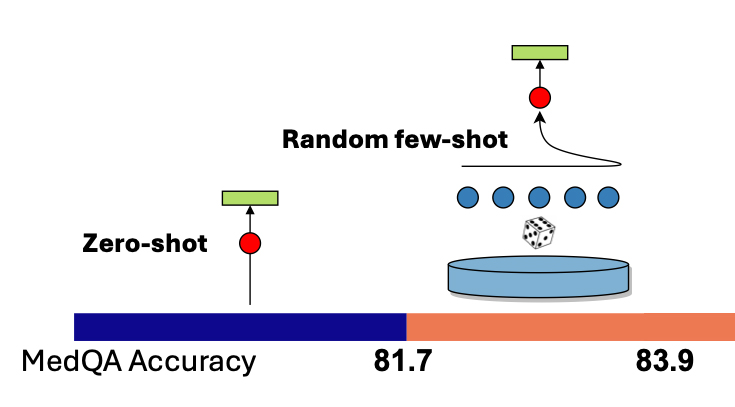